# Logistic Regression tutorial with scikit-learn

In [1]:
%matplotlib inline

## Basic Example of scikit-learn Logistic Regression

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from myutil import *

import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
## Set seed.
np.random.seed(seed=1)

## Define constants.
probs = [0.4, 0.15, 0.075, 0.075, 0.075, 0.075, 0.15]
n_options = 7
n_features = 8
positive_rate = 0.15
positive_rate_dev = positive_rate * 0.05
n_samples = 500
n_positives = int(round(n_samples * np.random.normal(positive_rate, positive_rate_dev)))
n_negatives = n_samples - n_positives

In [4]:
df_p = gen_dummy_cat_data(n_columns=n_features, n_samples=n_positives,
                          probs=probs, n_options=n_options,
                          is_positive=True)
df_n = gen_dummy_cat_data(n_columns=n_features, n_samples=n_negatives,
                          probs=probs, n_options=n_options,
                          is_positive=False)
sample_data = pd.concat([df_p, df_n], ignore_index=True)
sample_data = sample_data.reindex(np.random.permutation(sample_data.index)).reset_index(drop=True)

## If you'd like to import data from csv, execute myutil.gen_data_from_csv
# sample_data = gen_data_from_csv('sample.csv') 

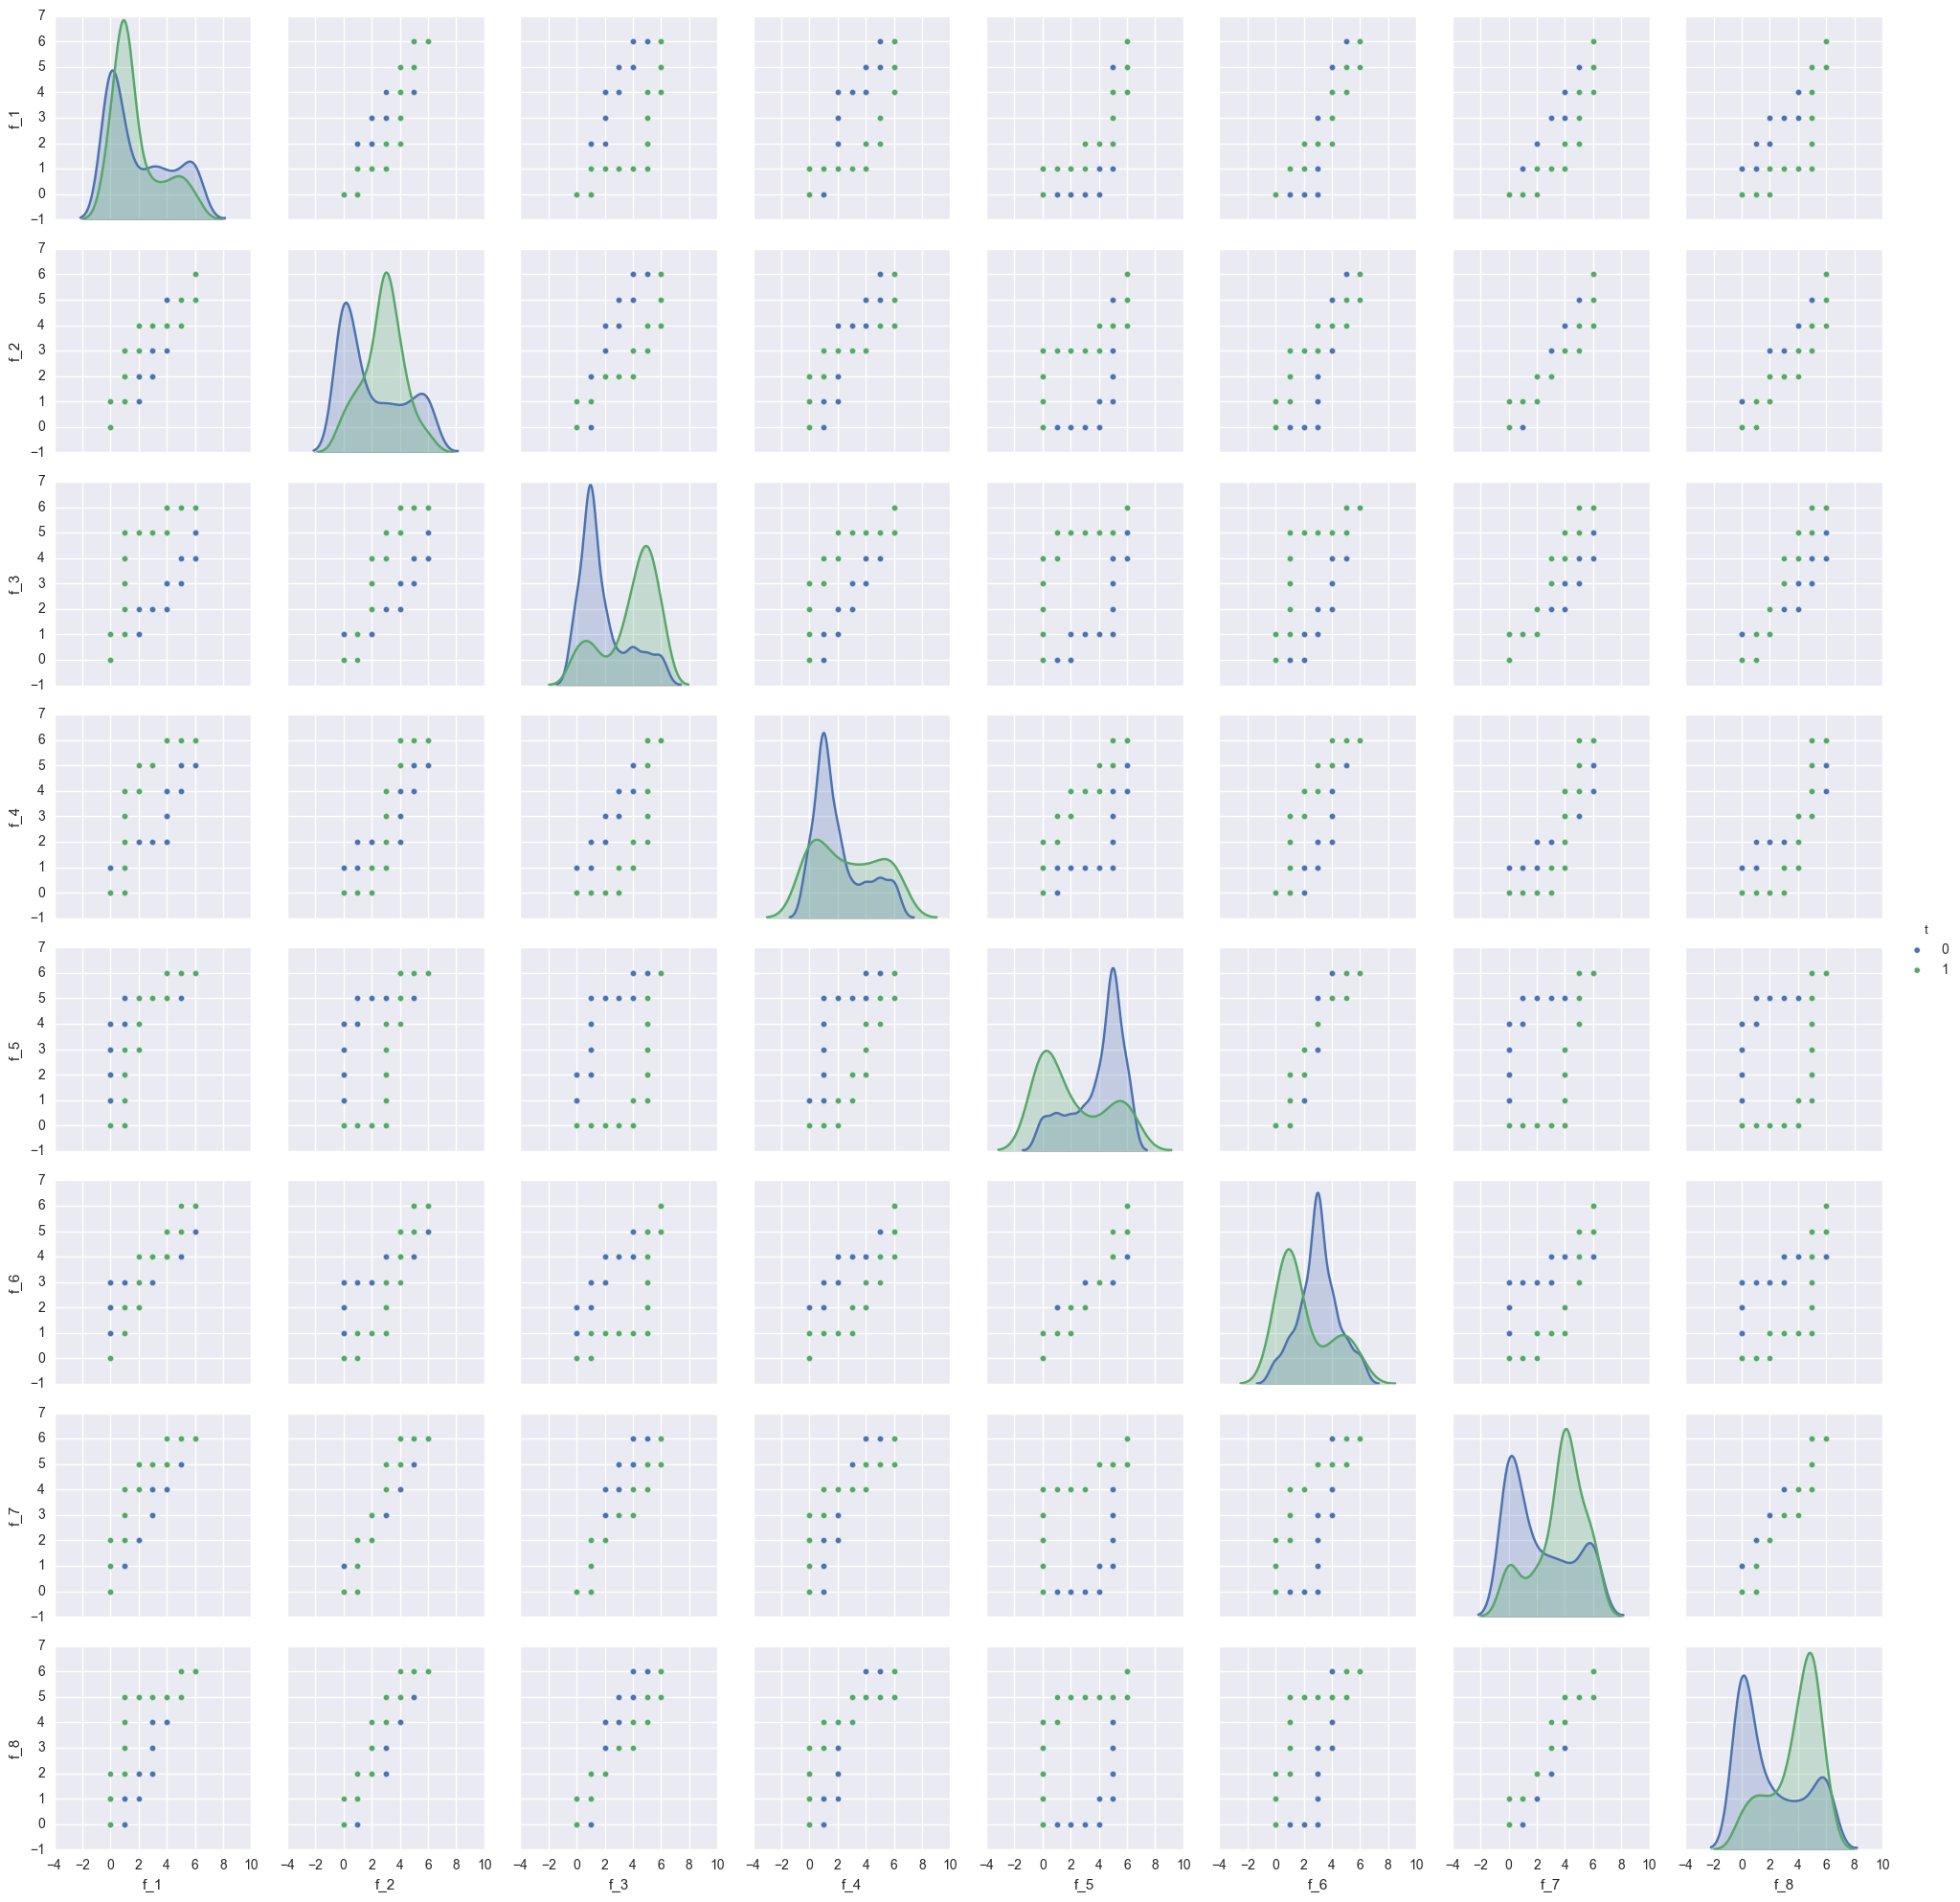

In [5]:
sns.pairplot(data=sample_data, hue='t',
             vars=sample_data.columns[:-1],
             diag_kind='kde', diag_kws=dict(shade=True))

In [6]:
train_X, test_X, train_t, test_t = train_test_split(
    sample_data.iloc[:,:-1].as_matrix(),
    np.squeeze(sample_data.iloc[:,-1:].as_matrix()),
    train_size = 0.8
)

In [7]:
model = LogisticRegression()
scores = cross_val_score(model, train_X, train_t, cv=5, scoring='f1')

In [8]:
print(scores)
print(np.average(scores))

[ 0.92857143  0.96551724  0.88888889  1.          0.96296296]
0.949188104361


In [9]:
predicted_t = cross_val_predict(model, test_X, test_t)

In [10]:
metrics.f1_score(test_t, predicted_t)

0.66666666666666663

In [11]:
compare = pd.DataFrame({'test': test_t, 'predicted': predicted_t}) 

In [12]:
compare[compare.test != compare.predicted]

,predicted,test
32,0,1
38,0,1
45,0,1
55,0,1


## GCS data analysis

In [13]:
gcs_data = gen_data_from_csv('brand_tracking_finance.csv')
gcs_data.head()

,Brand,Result,Interest,Limit,Service,Convenience,Trust,Speed,Major,Ads
0,Promise,0,1,1,1,1,1,1,4,4
1,Promise,0,1,1,1,1,1,1,1,4
2,Promise,0,1,1,1,1,1,1,1,1
3,Promise,0,4,4,3,4,2,3,5,5
4,Promise,0,4,4,4,4,4,4,4,4


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(gcs_data['Brand'])

LabelEncoder()

In [17]:
list(le.classes_)

['Acom', 'Aiful', 'Lake', 'Mobit', 'Promise']

In [18]:
transformed_brand = le.transform(gcs_data['Brand'])

In [19]:
gcs_data['brand'] = transformed_brand

In [20]:
gcs_data.head()

,Brand,Result,Interest,Limit,Service,Convenience,Trust,Speed,Major,Ads,brand
0,Promise,0,1,1,1,1,1,1,4,4,4
1,Promise,0,1,1,1,1,1,1,1,4,4
2,Promise,0,1,1,1,1,1,1,1,1,4
3,Promise,0,4,4,3,4,2,3,5,5,4
4,Promise,0,4,4,4,4,4,4,4,4,4


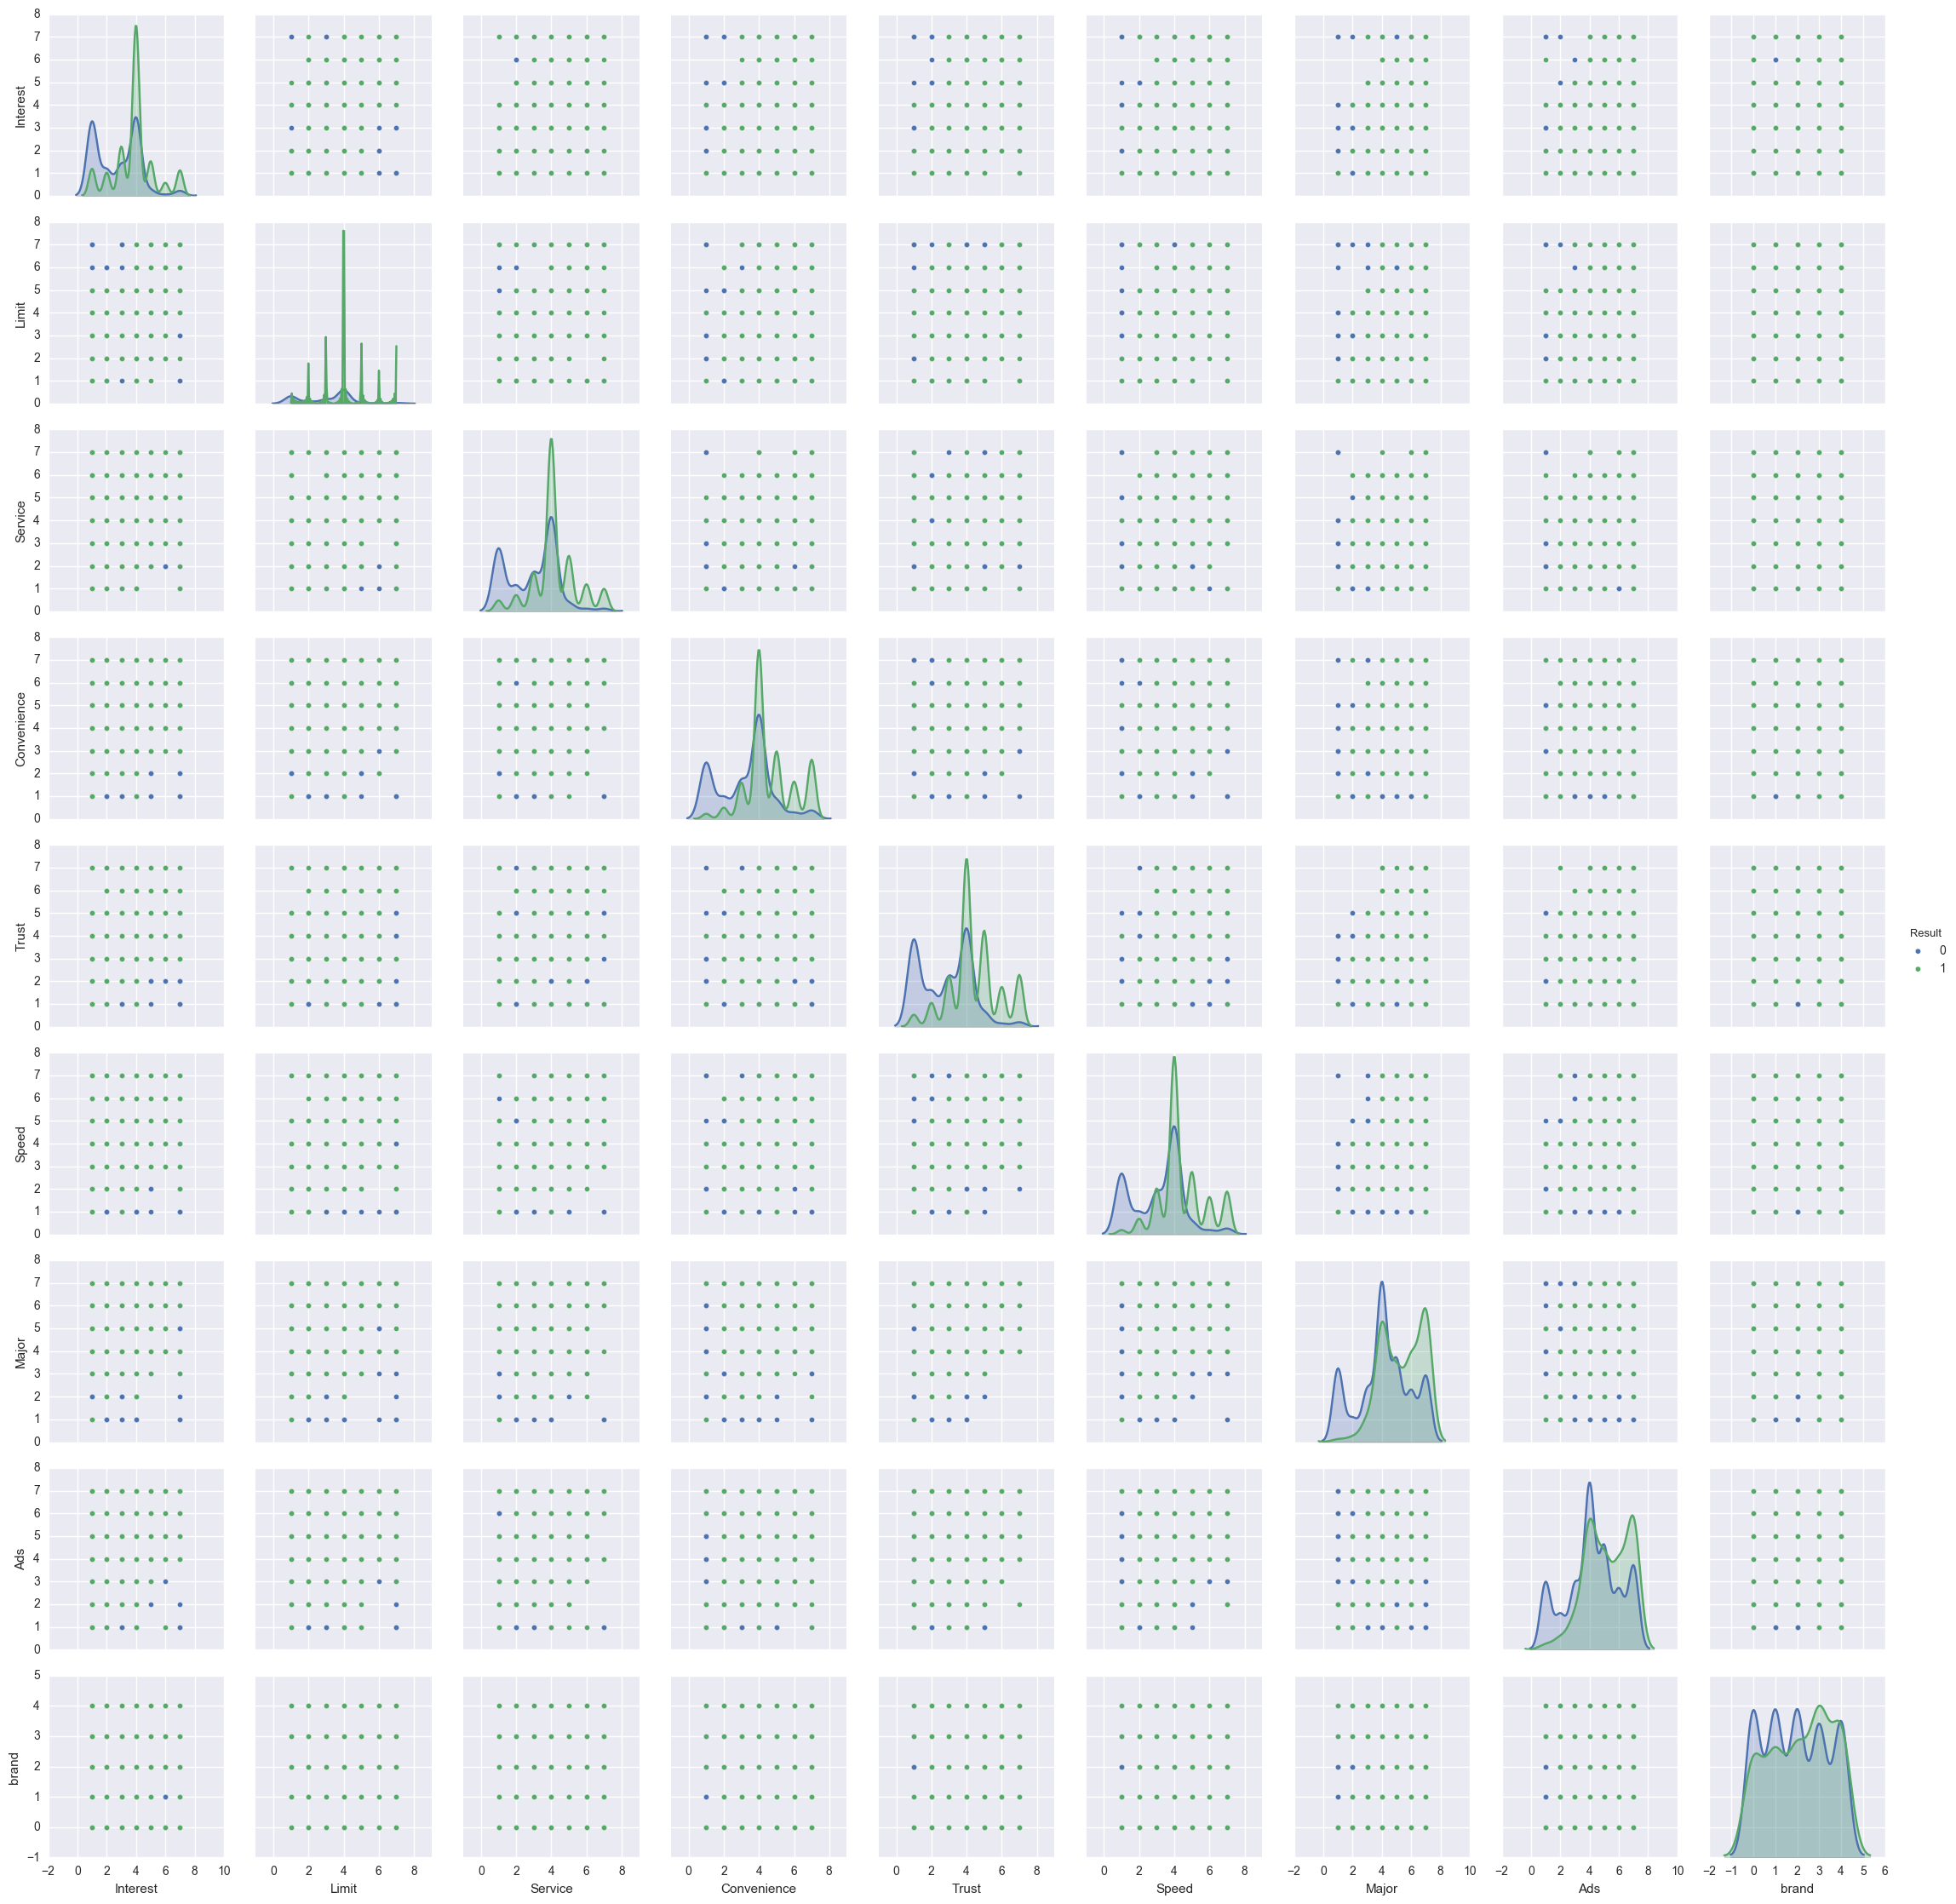

In [21]:
sns.pairplot(data=gcs_data, hue='Result',
             vars=gcs_data.columns[2:],
             diag_kind='kde', diag_kws=dict(shade=True))

In [22]:
gcs_train_X, gcs_test_X, gcs_train_t, gcs_test_t = train_test_split(
    gcs_data.iloc[:,2:].as_matrix(),
    np.squeeze(gcs_data['Result'].as_matrix()),
    train_size = 0.8
)

In [23]:
model_gcs = LogisticRegression()
gcs_scores = cross_val_score(model_gcs, gcs_train_X, gcs_train_t, cv=10, scoring='f1')

In [24]:
print(gcs_scores)
print(np.average(gcs_scores))

[ 0.51851852  0.47272727  0.31372549  0.44        0.34042553  0.29268293
  0.36734694  0.46808511  0.33333333  0.46153846]
0.400838358022


In [25]:
gcs_predicted_t = cross_val_predict(model_gcs, gcs_test_X, gcs_test_t)
metrics.f1_score(gcs_test_t, gcs_predicted_t)

0.24347826086956523

In [26]:
gcs_compare = pd.DataFrame({'test': gcs_test_t, 'predicted': gcs_predicted_t}) 
gcs_compare[gcs_compare.test != gcs_compare.predicted]

,predicted,test
7,0,1
10,0,1
16,0,1
17,0,1
19,0,1
24,1,0
25,0,1
27,0,1
30,1,0
36,0,1
